/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,659,146 (6.33 MB)

 Trainable params: 1,659,146 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 287s 152ms/step - accuracy: 0.8985 - loss: 0.3207 - val_accuracy: 0.9887 - val_loss: 0.0333 - learning_rate: 0.0010
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 334s 159ms/step - accuracy: 0.9789 - loss: 0.0734 - val_accuracy: 0.9904 - val_loss: 0.0291 - learning_rate: 0.0010
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 331s 164ms/step - accuracy: 0.9844 - loss: 0.0535 - val_accuracy: 0.9910 - val_loss: 0.0260 - learning_rate: 0.0010
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 312s 159ms/step - accuracy: 0.9872 - loss: 0.0423 - val_accuracy: 0.9914 - val_loss: 0.0267 - learning_rate: 0.0010
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 328s 162ms/step - accuracy: 0.9880 - loss: 0.0397 - val_accuracy: 0.9937 - val_loss: 0.0212 - learning_rate: 0.0010
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 303s 161ms/step - accuracy: 0.9909 - loss: 0.0288 - val_accuracy: 0.9930 - val_loss: 0.0244 - learning_rate: 0.0010
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 324s 162ms/step - accuracy: 0.9919 - loss: 0.0262 - val_accuracy: 0.9928 - val_loss: 0.0250 - learning_rate: 0.0010
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 326s 164ms/step - acc

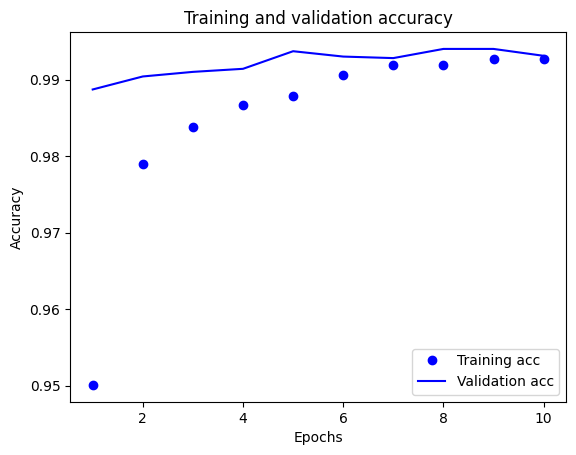

<Figure size 640x480 with 0 Axes>

In [5]:
from keras.models import Sequential as sequencial
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau


##
## dado que o range de valores possível para um pixel vai de  0 - 255
## escalonamos os valores entre 0-1
## esse processo torna o nosso modelo menos variante a pequenas alterações.

x_train = x_train / 255
x_test = x_test / 255

model = sequencial()
model.add(Conv2D(32, (5,5), activation='relu', padding= 'same', input_shape=(28,28,1)))
model.add(Conv2D(64, (5,5), activation='relu', padding= 'same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## usada na camada de saída do classificador, onde realmente estamos tentando gerar a probabilidade para definir a classe de cada entrada
otmizador = Adam()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

## Reduz o parametro de learning rate se não houver, melhora em determinado numero de epocas
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

batch_size = 32
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), validation_split =0.2,verbose=1, callbacks=[learning_rate_reduction])

history_dict = history.history
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']
range_epochs=range(1,len(acc)+1)

plt.style.use('default')
acc_values = plt.plot(range_epochs, acc, 'bo', label='Training acc')
val_acc_values = plt.plot(range_epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to include a channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)
